Import Packages and Libraries

In [44]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as npA
from scipy.stats import norm
from scipy import stats
%matplotlib inline

Load Data Set

In [45]:
auto = pd.read_csv('./data/auto-mpg3.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [46]:
auto.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [47]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [48]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [49]:
profile = ProfileReport(auto, title="Pandas Profiling Report", explorative=True)

In [50]:
profile.to_widgets()

Cleaning and Formating


In [53]:
# horsepower contains a placeholder '?' this is causing horsepower to have an 'object' data type 
print(auto.horsepower.unique())


['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [54]:
# rows with placeholder
auto[auto['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [55]:
# shape of original 
auto.shape

(398, 9)

In [56]:
# drop rows with '?' placeholder
auto = auto[auto.horsepower !='?']

In [57]:
# there are 392 rows after dropping rows with placeholder from horsepower column
auto.shape

(392, 9)

In [58]:
# horsepower still has a datatype object
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [59]:
# changing horsepower to float
auto.horsepower = auto.horsepower.astype('float')
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [60]:
auto.origin.unique()

array([1, 3, 2], dtype=int64)

In [65]:
# adding a column 'country' which corresponds to the three numbers for 'origin'
auto['country'] = auto.origin.replace([1,2,3],['US','Europe','Japan'])

print(auto.country.unique())
auto.head()

['US' 'Japan' 'Europe']


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,country
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,US
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,US
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,US
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,US
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,US


In [66]:
# adding column weight2
auto['weight2'] = auto['weight']*auto['weight']
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,country,weight2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,US,12278016
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,US,13638249
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,US,11806096
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,US,11785489
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,US,11895601


Additional EDA

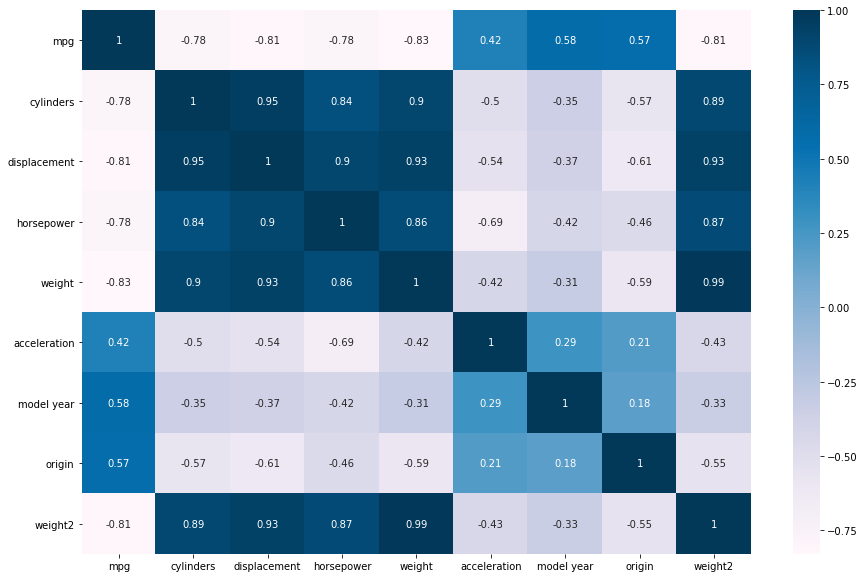

In [18]:
corr_map = auto.corr().round(2)
plt.subplots(figsize=(15,10))
sns.heatmap(data=corr_map,cmap='PuBu', annot=True)
plt.show()

In [63]:
(auto.corr()['mpg'].sort_values()).to_frame()                    

,mpg
weight,-0.832244
displacement,-0.805127
horsepower,-0.778427
cylinders,-0.777618
acceleration,0.423329
origin,0.565209
model year,0.580541
mpg,1.000000


C:\Users\jleeb\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


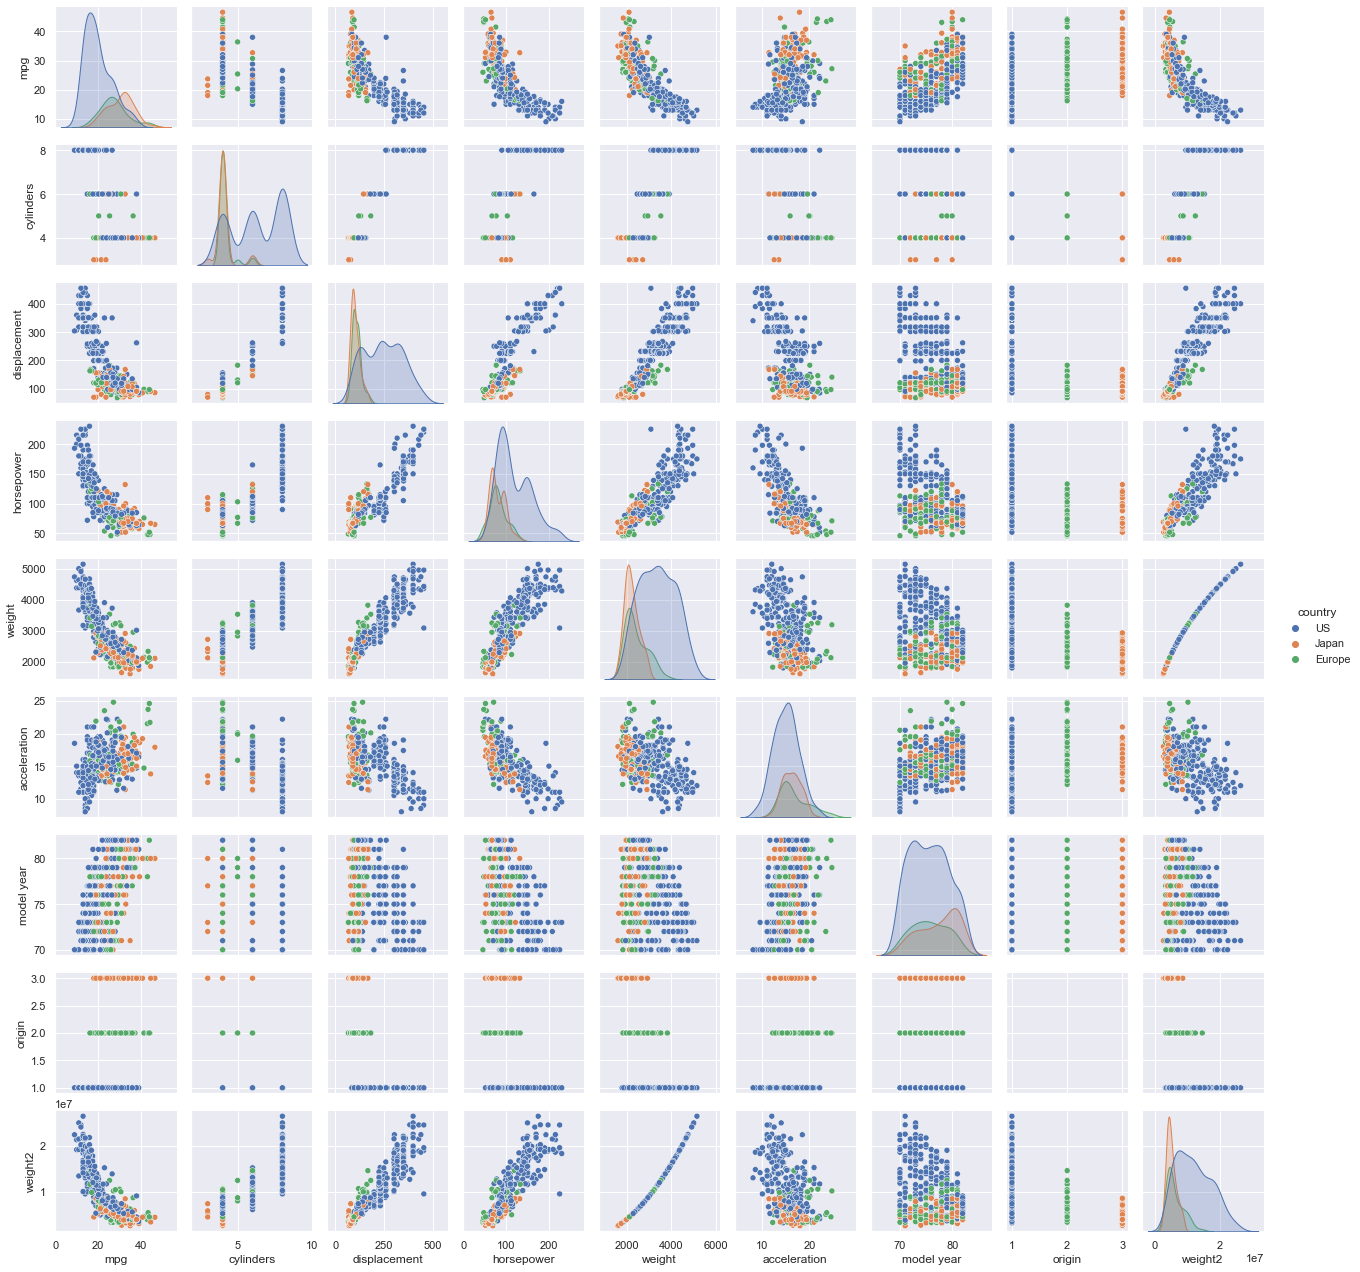

In [20]:
sns.set()
sns.pairplot(auto, height = 2.0,hue ='country')
plt.show()
import warnings
warnings.filterwarnings('ignore')

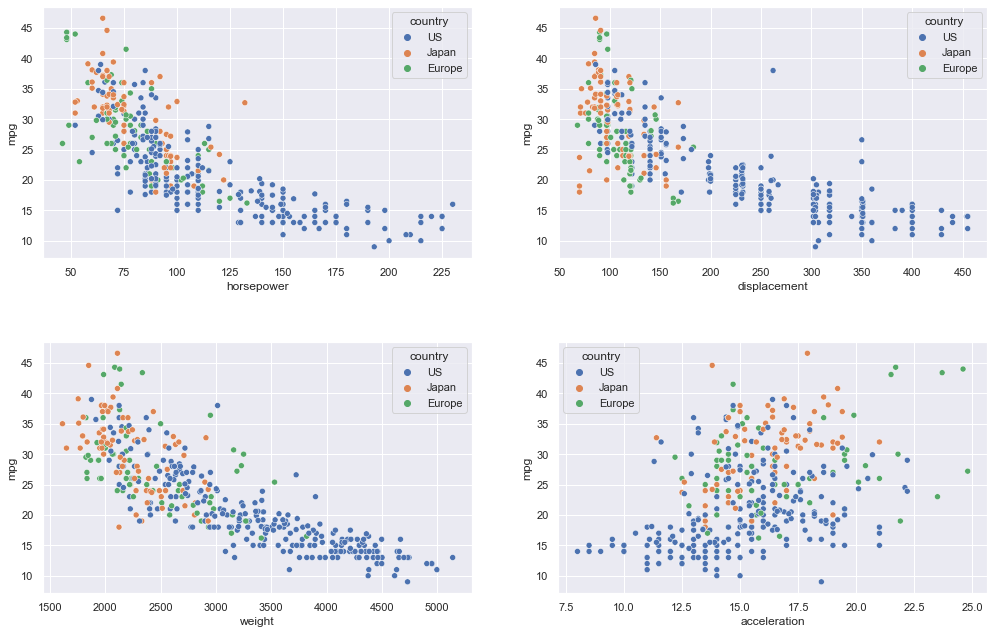

In [76]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))

plt.subplot(221)
k1 = sns.scatterplot('horsepower','mpg',data=auto,hue='country')


plt.subplot(222)
k2 = sns.scatterplot('displacement','mpg',data=auto,hue='country')


plt.subplot(223)
k3 = sns.scatterplot('weight','mpg',data=auto,hue='country')


plt.subplot(224)
k4 = sns.scatterplot(data=auto, x='acceleration', y='mpg', hue='country')  
plt.tight_layout(pad=5)

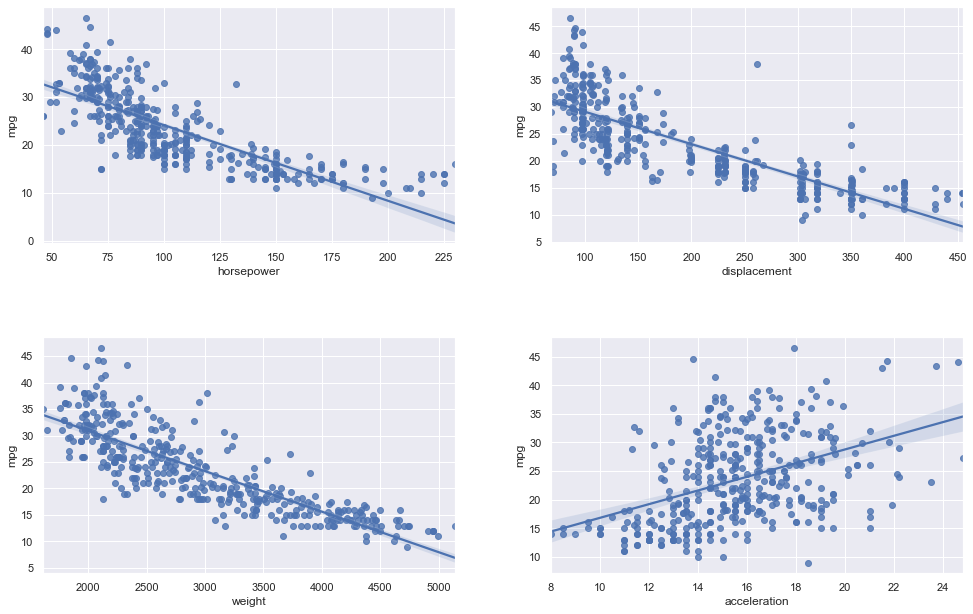

In [35]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))

plt.subplot(221)
k1 = sns.regplot('horsepower','mpg',data=auto)


plt.subplot(222)
k2 = sns.regplot('displacement','mpg',data=auto)


plt.subplot(223)
k3 = sns.regplot('weight','mpg',data=auto)


plt.subplot(224)
k4 = sns.regplot(data=auto, x='acceleration', y='mpg')  
plt.tight_layout(pad=5)

In [36]:
auto['car name'].value_counts()

amc matador              5
ford pinto               5
toyota corolla           5
toyota corona            4
peugeot 504              4
                        ..
honda civic (auto)       1
toyota corolla tercel    1
ford fairmont futura     1
datsun 310               1
dodge rampage            1
Name: car name, Length: 301, dtype: int64

Regression Analysis

In [72]:
X = auto.drop(['mpg', 'cylinders', 'model year',  'car name', 'country'],axis=1)
y = auto['mpg']
X

,displacement,horsepower,weight,acceleration,origin,weight2
0,307.0,130.0,3504,12.0,1,12278016
1,350.0,165.0,3693,11.5,1,13638249
2,318.0,150.0,3436,11.0,1,11806096
3,304.0,150.0,3433,12.0,1,11785489
4,302.0,140.0,3449,10.5,1,11895601
...,...,...,...,...,...,...
393,140.0,86.0,2790,15.6,1,7784100
394,97.0,52.0,2130,24.6,2,4536900
395,135.0,84.0,2295,11.6,1,5267025
396,120.0,79.0,2625,18.6,1,6890625


Regression using Linear Model

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [74]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()    #instantiate
lm.fit(X_train,y_train)    #fit
pred = lm.predict(X_test)  #predict

In [75]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)
print(r2)

0.7334070200070866


Regression using Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_test)
r2_rfr = r2_score(y_test, rfr_pred)
print(r2_rfr)

0.7595387686761795


In [26]:
# determining the feature importance 
rfr.feature_importances_

array([0.37475481, 0.15126232, 0.17679294, 0.06094761, 0.01733852,
       0.21890381])

[0.37475481 0.15126232 0.17679294 0.06094761 0.01733852 0.21890381] Index(['displacement', 'horsepower', 'weight', 'acceleration', 'origin',
       'weight2'],
      dtype='object')


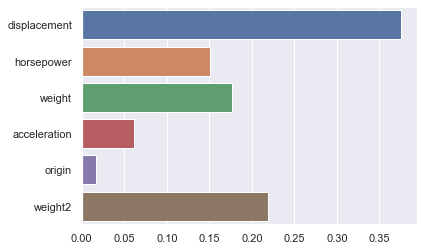

In [27]:
# plot of feature importance
print(rfr.feature_importances_,X_train.columns)
sns.barplot(x=rfr.feature_importances_, y=X_train.columns)

Standardizing the Data using StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler()
y_scaled = StandardScaler()
X_train_scaled = X_scaled.fit_transform(X_train)
X_test_scaled = X_scaled.transform(X_test)
y_train_scaled = y_scaled.fit(y_train.values.reshape(-1,1))
y_train_scaled = y_scaled.transform(y_train.values.reshape(-1,1))
y_test_scaled = y_scaled.transform(y_test.values.reshape(-1,1))

In [30]:
scaled_reg = LinearRegression()
scaled_reg.fit(X_train_scaled,y_train_scaled)
y_pred = y_scaled.inverse_transform(scaled_reg.predict(X_test_scaled))

In [31]:
# regression score after standardizing the data.  overall score for linear regression did not improve
r2_scaled = r2_score(y_test,y_pred)
print(r2_scaled)

0.7334070200070562


Adjusting for multicolinearity

In [35]:
# determining VIF factor for the different features
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_temp = X
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

   VIF Factor      features
0        54.2  displacement
1        66.2    horsepower
2       466.3        weight
3        62.0  acceleration
4         7.7        origin
5       105.1       weight2


In [37]:
# dropping displacement
X = auto.drop(['mpg', 'cylinders', 'model year', 'car name', 'displacement','country'],axis=1)

In [38]:
# VIF improved after dropping displacement
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_temp = X
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

   VIF Factor      features
0        58.4    horsepower
1       434.3        weight
2        59.6  acceleration
3         6.6        origin
4       104.1       weight2


Linear Regression after adjusting for multicolinearity by dropping weight

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [40]:
lm = LinearRegression()    #instantiate
lm.fit(X_train,y_train)    #fit
pred2 = lm.predict(X_test)  #predict

In [41]:
r2 = r2_score(y_test, pred2)
print(r2)

0.7341702859530228


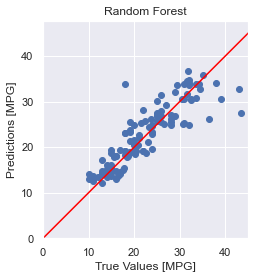

In [78]:
plt.scatter(y_test, rfr_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.title('Random Forest')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100,100],[-100,100],color='red')
plt.show()

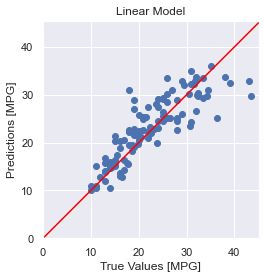

In [77]:
plt.scatter(y_test, pred2)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.title('Linear Model')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100,100],[-100,100],color='red')
plt.show()